# CNN 기반 Classification

### [예제 6] MNIST-Classifier by CNN: 3 Convolution Layer

>### Load modules

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

print("NumPy Version :{}".format(np.__version__))
print("TensorFlow Version :{}".format(tf.__version__))
print("Matplotlib Version :{}".format(plt.matplotlib.__version__))

NumPy Version :1.18.5
TensorFlow Version :2.3.0
Matplotlib Version :3.2.2


> ### Load MNIST Data

In [2]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

train_data = train_data.astype(np.double)
train_data = np.expand_dims(train_data, axis=-1)
train_data = train_data / 255.0

test_data = test_data.astype(np.double)
test_data = np.expand_dims(test_data, axis=-1)
test_data = test_data / 255.0

11493376/11490434 [==============================] - 0s 0us/step


>### Create Model


In [3]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same',activation='sigmoid',input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same',activation='sigmoid'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same',activation='sigmoid'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              #loss='categorical_crossentropy',
              metrics=['accuracy'])

>### 결과 출력을 위한 함수

In [5]:
def Make_Result_Plot(suptitle:str, data:np.ndarray, label:np.ndarray, y_max:np.ndarray):
    fig_result, ax_result = plt.subplots(2,5,figsize=(18, 7))
    fig_result.suptitle(suptitle)
    for idx in range(10):
        ax_result[idx//5][idx%5].imshow(data[idx].reshape((28,28)),cmap="binary")
        ax_result[idx//5][idx%5].set_title("test_data[{}] (label : {} / y : {})".format(idx, label[idx], y_max[idx]))

> ### 학습 전 상황

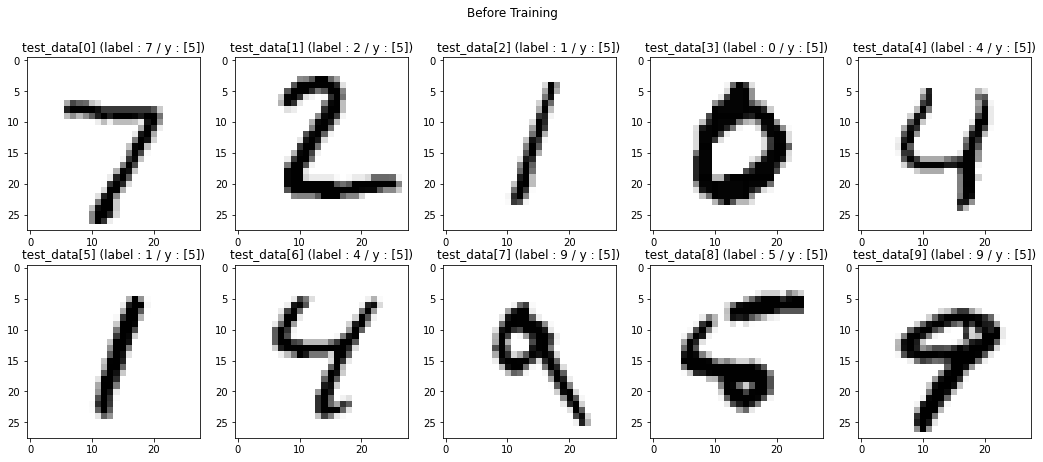

In [6]:
y_out = model.predict(test_data)
y_max = np.argmax(y_out, axis=1).reshape((-1, 1))
Make_Result_Plot("Before Training", test_data, test_labels, y_max)

> ### 학습 (Training)

In [7]:
%%time
history = model.fit(train_data, train_labels, shuffle=True,
                 batch_size=100, epochs=10,
                 validation_data=(test_data, test_labels)
                 )

Epoch 1/10
600/600 [==============================] - 3s 6ms/step - loss: 1.1481 - accuracy: 0.6168 - val_loss: 0.2264 - val_accuracy: 0.9379
Epoch 2/10
600/600 [==============================] - 3s 5ms/step - loss: 0.1721 - accuracy: 0.9515 - val_loss: 0.1228 - val_accuracy: 0.9657
Epoch 3/10
600/600 [==============================] - 3s 5ms/step - loss: 0.1077 - accuracy: 0.9690 - val_loss: 0.0842 - val_accuracy: 0.9756
Epoch 4/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0809 - accuracy: 0.9769 - val_loss: 0.0634 - val_accuracy: 0.9823
Epoch 5/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0645 - accuracy: 0.9814 - val_loss: 0.0527 - val_accuracy: 0.9836
Epoch 6/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0535 - accuracy: 0.9848 - val_loss: 0.0471 - val_accuracy: 0.9858
Epoch 7/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0451 - accuracy: 0.9869 - val_loss: 0.0407 - val_accuracy: 0.9870
Epoch 

> ### Ploting : Cost/Training Count

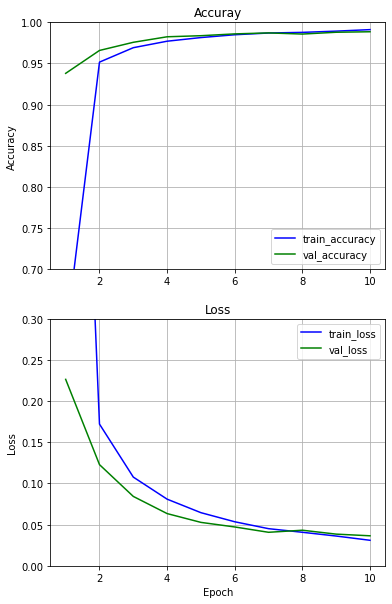

In [8]:
loss = history.history['loss']
epochs = range(1, len(loss)+1)

plt.figure(figsize=(6, 10))
plt.subplot(2, 1, 1)
plt.title('Accuray')
plt.plot(epochs, history.history['accuracy'], 'b', label='train_accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'g', label='val_accuracy')
plt.ylim([0.7,1])
plt.grid(True)
plt.ylabel('Accuracy')
plt.legend(loc='best')

plt.subplot(2, 1, 2)
plt.title('Loss')
plt.plot(epochs, history.history['loss'], 'b', label='train_loss')
plt.plot(epochs, history.history['val_loss'], 'g', label='val_loss')
plt.ylim([0,0.3])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

> ### Training 이후

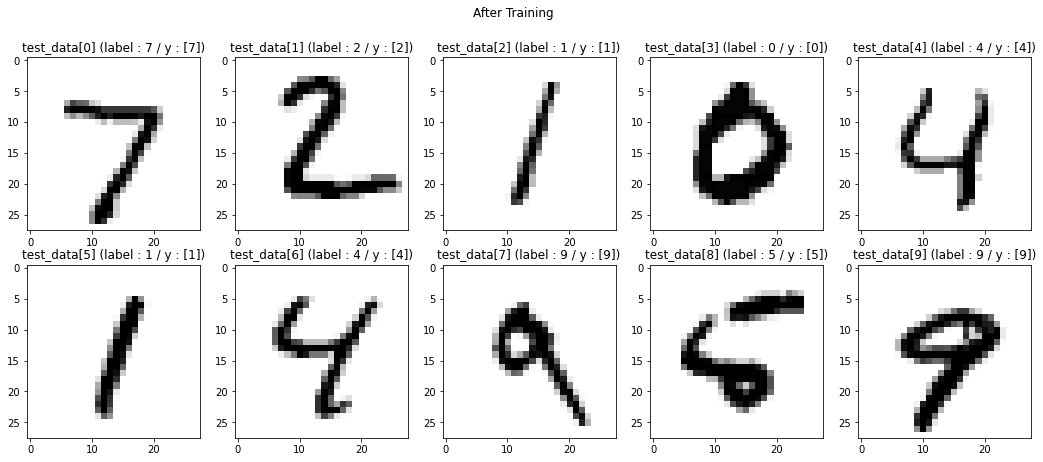

In [9]:
y_out = model.predict(test_data)
y_max = np.argmax(y_out, axis=1).reshape((-1, 1))
Make_Result_Plot("After Training", test_data, test_labels, y_max)

In [10]:
def square(imgs, n): # n x n 개의 그림 그리는 함수
  plt.figure(figsize=(10,10))
  for i in range(n):
    for j in range(n):
      p_num = i * n + j         
      ax = plt.subplot(n, n, p_num+1)
      ax.set_xticks([])
      ax.set_yticks([])
      plt.imshow(imgs[0, :, :, p_num], cmap='gray')
  plt.show()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          36928     
Total params: 74,496
Trainable params: 74,496
Non-trainable params: 0
__________________________________________________

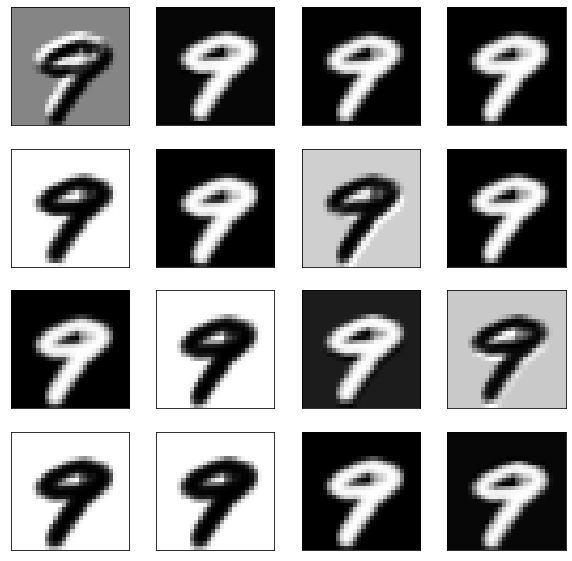

conv2d_1


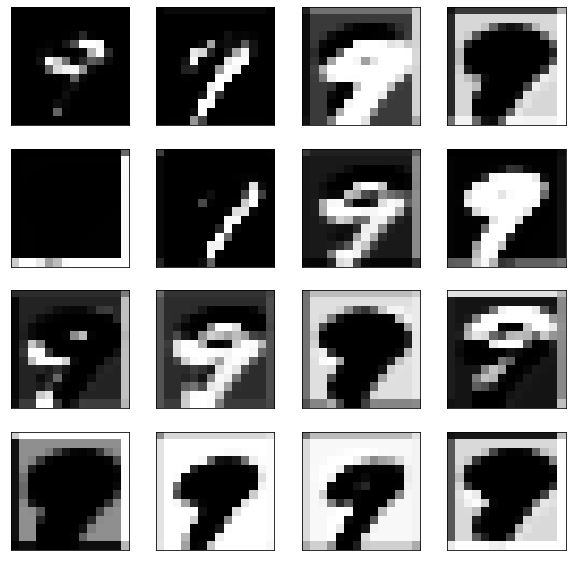

conv2d_2


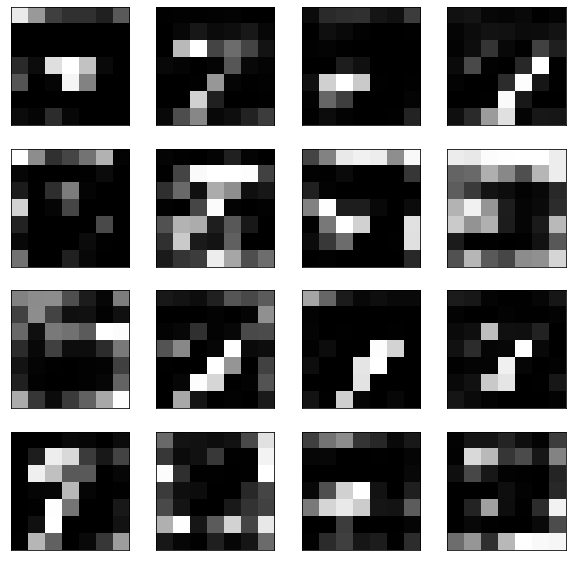

In [12]:
ixs = [0, 2, 4]
outputs = [model.layers[i].output for i in ixs] # 다수의 output 설정
model_fm = tf.keras.models.Model(inputs=model.inputs, outputs=outputs) # 새로운 모델 생성: input은 동일, output은 다수
model_fm.summary()
feature_maps = model_fm.predict(test_data[9:10]) # 모델을 돌려 다수의 출력을 저장
print(feature_maps[0].shape, feature_maps[1].shape, feature_maps[2].shape)
layers_names = model_fm.output_names # output의 이름을 저장
# feature_maps[0].shape

for i, fmap in enumerate(feature_maps): # output을 하나씩 그려줌, output은 곧 Feature map, 8x8=64개 채널만 그려줌
  print(layers_names[i])
  square(fmap, 8)